In [103]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Initial conditios

In [104]:
position_velocity_x = np.array([0.00141421356237,  500.0])
position_velocity_y = np.array([0, 0])
position_velocity_z = np.array([0.001, 50.0])

w_c = 4199949.94262
w_z = 568268.529404

In [105]:
def derivatives_x(position_velocity_x, position_velocity_y, t):
    return np.array([position_velocity_x[1], w_c*position_velocity_y[1]+0.5*pow(w_z,2)*position_velocity_x[0]])

def derivatives_y(position_velocity_y, position_velocity_x, t):
    return np.array([position_velocity_y[1],-w_c*position_velocity_x[1]+0.5*pow(w_z,2)*position_velocity_y[0]])

                                    #place_holder so that it can be used with rk4
def derivatives_z(position_velocity_z, place_holder, t):
    return np.array([position_velocity_z[1], -pow(w_z,2)*position_velocity_z[0]])



#taken from... (see references)
def rk4(y,dy,func_i2,t,h):
    k1=dy(y,func_i2,t)
    k2=dy(y+h/2*k1,func_i2,t+h/2)
    k3=dy(y+h/2*k2,func_i2,t+h/2)
    k4=dy(y+h*k3,func_i2,t+h)
    y=y+h*(k1+2*k2+2*k3+k4)/6
    t=t+h
    return (t,y)

def implement_rk4(position_velocity_x, position_velocity_y, position_velocity_z, t, h, steps_no):
    global time_arr
    time_arr = np.array([t])
    data_x = np.array([position_velocity_x])
    data_y = np.array([position_velocity_y])
    data_z = np.array([position_velocity_z])


    for i in range(steps_no):
        temp1 = position_velocity_x
        (t, position_velocity_x) = rk4( position_velocity_x, derivatives_x, position_velocity_y, t,h)
        t -=h
        (t, position_velocity_y) = rk4(position_velocity_y, derivatives_y,  temp1, t,h)
        t -=h
        (t, position_velocity_z) = rk4(position_velocity_z, derivatives_z,  0, t,h)

        #time_arr = np.append(time_arr, t)
        data_x = np.vstack((data_x, position_velocity_x))
        data_y = np.vstack((data_y, position_velocity_y))
        data_z = np.vstack((data_z, position_velocity_z))

        time_arr = np.append(time_arr, t)

    [x, vx] = data_x.transpose()
    [y, vy] = data_y.transpose()
    [z, zy] = data_z.transpose()


    return [x ,y, z] # can also return vx, vy, vz for energies and othe info



In [106]:
t = 0 # starting time
h = 1/(500000000) # step size for the RK4 method
steps_no = 30000 # 0number of steps of the RK4 method


In [107]:

(ymin, ymax) = (-0.003, 0.003)
(xmin, xmax) = (-0.003, 0.003)
(zmin, zmax) = (-0.003, 0.003)


In [108]:
[x, y, z] = implement_rk4(position_velocity_x, position_velocity_y, position_velocity_z, t, h, steps_no)

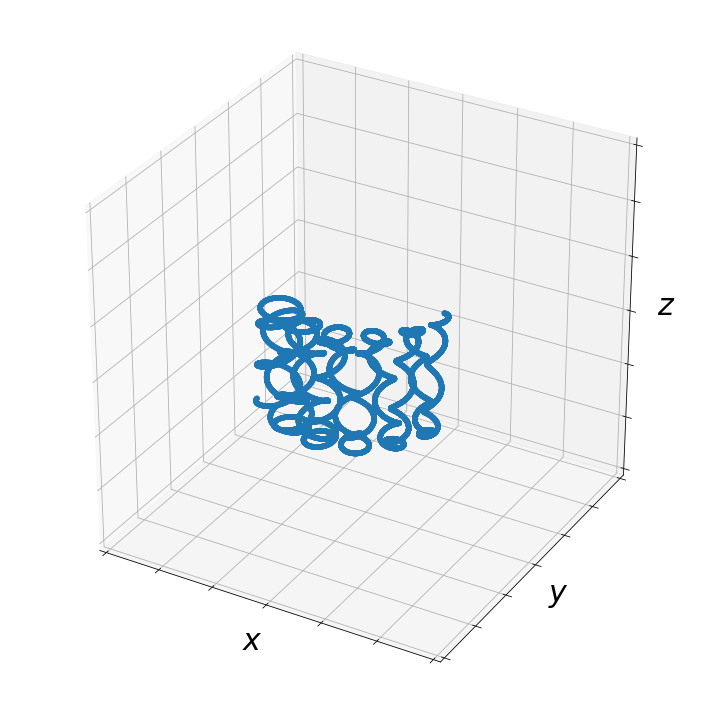

In [109]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d', autoscale_on=False,xlim=(xmin,xmax), ylim=(ymin,ymax), zlim=(zmin,zmax))
ax.scatter(x, y, z)


ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.axes.zaxis.set_ticklabels([])
ax.set_xlabel('$x$', fontsize=30)
ax.set_ylabel('$y$', fontsize=30)
ax.set_zlabel('$z$', fontsize=30)
plt.tight_layout()

plt.show()
plt.close()